# Tutorial Pandas aplicado a datos de COVID-19

Pequeño tutorial muy básico sobre Pandas DataFrames, como cargar datos de un fichero CSV, algunas manipulaciones básicas y representación de los datos en forma de gráficas.

In [1]:
# Importar pandas y cualquier otra librería necesaria
import pandas as pd
import numpy as np
from scipy import interpolate
# Permite visualizar plots de matplotlib en el notebook
%matplotlib inline 

## Carga datos en DataFrames desde CSV
Este turorial se basa en algunos de los datos publicados en GitHub para la elaboración del [Coronavirus COVID-19 Global Cases by the Center for Systems Science and Engineering (CSSE)](https://coronavirus.jhu.edu/map.html) de la Universidad Johns Hopkins en USA.
Los datos están disponibles en [GitHub](https://urldefense.proofpoint.com/v2/url?u=https-3A__github.com_CSSEGISandData_2019-2DnCoV&d=DwMFaQ&c=n6-cguzQvX_tUIrZOS_4Og&r=ZNGvwmzlj8kMBY6JiOVCuA&m=I4tRzMk97krELxTlEBHo8DfBIHceLgA3njBSxpFaSkY&s=UBc1VDxKy4sUqMpr8gzpszg8V_iQ8FbOR-2YTsMe81E&e=).

Si los archivos en CSV dejaran de estar disponibles en repositorio de GitHub anterior, se incluyen algunos ficheros de ejemplo en este mismo repositorio.

In [2]:
global_confirmed_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
global_deaths_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
global_recovered_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# Descomente las siguientes líneas si hay problemas al cargar los datos del GitHub original en la siguiente celda 
#global_confirmed_url = 'https://github.com/mercaderd/python-notebooks/raw/master/covid_data_csv/time_series_covid19_confirmed_global.csv'
#global_deaths_url = 'https://github.com/mercaderd/python-notebooks/raw/master/covid_data_csv/time_series_covid19_deaths_global.csv'
#global_recovered_url = 'https://github.com/mercaderd/python-notebooks/raw/master/covid_data_csv/time_series_covid19_recovered_global.csv'

In [3]:
# Conversion necessaria para sustituir algunos valores en blanco de la comumna Province/State 
f = lambda x : 'Country' if x is '' else x 

# Carga de datos en 3 DataFrames distintos
global_confirmed  = pd.read_csv(global_confirmed_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                parse_dates = True,
                                converters = {'Province/State' : f})
global_deaths  = pd.read_csv(global_deaths_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                parse_dates = True,
                                converters = {'Province/State' : f})
global_recovered  = pd.read_csv(global_recovered_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                parse_dates = True,
                                converters = {'Province/State' : f})

In [4]:
# Se desechan algunas columnas innecesarias, se traspone el Dataframe (cambiar filas por columnas) 
# y se convierte el índice a formato datetime. Para los tres Dataframes cargados.
global_confirmed = global_confirmed.drop(columns=['Lat','Long']).T
global_confirmed.index = pd.to_datetime(global_confirmed.index)

global_deaths = global_deaths.drop(columns=['Lat','Long']).T
global_deaths.index = pd.to_datetime(global_deaths.index)

global_recovered = global_recovered.drop(columns=['Lat','Long']).T
global_recovered.index = pd.to_datetime(global_recovered.index)

global_conf_rec = global_confirmed.sub(global_recovered) 

Se puede visualizar uno de los Dataframes para comprobar cómo están organizados los datos. Para cada uno de los Dataframes los datos de cada país corresponden a una columna, y los datos por fechas se corresponden con las filas:

In [5]:
global_confirmed.head()

Province/State     Country                                                     \
Country/Region Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
2020-01-22               0       0       0       0      0                   0   
2020-01-23               0       0       0       0      0                   0   
2020-01-24               0       0       0       0      0                   0   
2020-01-25               0       0       0       0      0                   0   
2020-01-26               0       0       0       0      0                   0   

Province/State                   Australian Capital Territory New South Wales  \
Country/Region Argentina Armenia                    Australia       Australia   
2020-01-22             0       0                            0               0   
2020-01-23             0       0                            0               0   
2020-01-24             0       0                            0               0   
2020-01-25             0       0                            0               0   
2020-01-26             0       0                            0               3   

Province/State   ...           Country                                       \
Country/Region   ...    United Kingdom Uruguay Uzbekistan Venezuela Vietnam   
2020-01-22       ...                 0       0          0         0       0   
2020-01-23       ...                 0       0          0         0       2   
2020-01-24       ...                 0       0          0         0       2   
2020-01-25       ...                 0       0          0         0       2   
2020-01-26       ...                 0       0          0         0       2   

Province/State                                                          
Country/Region West Bank and Gaza Western Sahara Yemen Zambia Zimbabwe  
2020-01-22                      0              0     0      0        0  
2020-01-23                      0              0     0      0        0  
2020-01-24                      0              0     0      0        0  
2020-01-25                      0              0     0      0        0  
2020-01-26                      0              0     0      0        0  

[5 rows x 266 columns]

In [6]:
global_confirmed['Country'][['France','Spain']].tail()

Country/Region,France,Spain
2020-08-27,281603,429507
2020-08-28,288655,439286
2020-08-29,288531,439286
2020-08-30,299320,439286
2020-08-31,302175,462858


In [7]:
global_confirmed['Country','EU'] = global_confirmed['Country'][['Spain','France','Germany','Portugal',
                                                                'Austria','Belgium','Italy','Bulgaria','Croatia',
                                                               'Cyprus','Denmark','Estonia','Finland',
                                                               'Greece','Hungary','Ireland','Latvia',
                                                               'Lithuania','Luxembourg','Malta','Netherlands',
                                                               'Poland','Romania','Slovakia','Slovenia',
                                                               'Sweden','Czechia']].sum(axis=1)
global_deaths['Country','EU'] = global_deaths['Country'][['Spain','France','Germany','Portugal',
                                                                'Austria','Belgium','Italy','Bulgaria','Croatia',
                                                               'Cyprus','Denmark','Estonia','Finland',
                                                               'Greece','Hungary','Ireland','Latvia',
                                                               'Lithuania','Luxembourg','Malta','Netherlands',
                                                               'Poland','Romania','Slovakia','Slovenia',
                                                               'Sweden','Czechia']].sum(axis=1)
global_recovered['Country','EU'] = global_recovered['Country'][['Spain','France','Germany','Portugal',
                                                                'Austria','Belgium','Italy','Bulgaria','Croatia',
                                                               'Cyprus','Denmark','Estonia','Finland',
                                                               'Greece','Hungary','Ireland','Latvia',
                                                               'Lithuania','Luxembourg','Malta','Netherlands',
                                                               'Poland','Romania','Slovakia','Slovenia',
                                                               'Sweden','Czechia']].sum(axis=1)
global_conf_rec['Country','EU'] = global_conf_rec['Country'][['Spain','France','Germany','Portugal',
                                                                'Austria','Belgium','Italy','Bulgaria','Croatia',
                                                               'Cyprus','Denmark','Estonia','Finland',
                                                               'Greece','Hungary','Ireland','Latvia',
                                                               'Lithuania','Luxembourg','Malta','Netherlands',
                                                               'Poland','Romania','Slovakia','Slovenia',
                                                               'Sweden','Czechia']].sum(axis=1)


Se pueden crear nuevas series sumando las de otros paises. Por ejemplo, obtener los valores de la EU (TBC). También se puede usar la función sum() de un dataframe

In [8]:

print("Recovered: " + str(global_recovered.shape))
print("Confirmed: " + str(global_confirmed.shape))
print("Confirmed - Recovered: " + str(global_conf_rec.shape))

Recovered: (223, 254)
Confirmed: (223, 267)
Confirmed - Recovered: (223, 268)


In [9]:
global_deaths['Country'][['EU','US']].to_csv('./covid_data_csv/deaths_data.csv')
global_confirmed['Country'][['EU','US']].to_csv('./covid_data_csv/confirmed_data.csv')
global_recovered['Country'][['EU','US']].to_csv('./covid_data_csv/recovered_data.csv')
global_conf_rec['Country'][['EU','US']].to_csv('./covid_data_csv/conf_rec_data.csv')
global_confirmed['Country'][['Spain','France', 'Italy', 'Germany', 'Austria', 'Hungary', 'United Kingdom']].to_csv('./covid_data_csv/confirmed_eu_data.csv')
global_deaths['Country'][['Spain','France', 'Italy', 'Germany', 'Austria', 'Hungary', 'United Kingdom']].to_csv('./covid_data_csv/deaths_eu_data.csv')
global_recovered['Country'][['Spain','France', 'Italy', 'Germany', 'Austria', 'Hungary', 'United Kingdom']].to_csv('./covid_data_csv/recovered_eu_data.csv')
global_conf_rec['Country'][['Spain','France', 'Italy', 'Germany', 'Austria', 'Hungary', 'United Kingdom']].to_csv('./covid_data_csv/conf_rec_eu_data.csv')

# Cargar datos con coordenadas GPS

Se cargan en otros Dataframes los datos a modo de cabecera, con las regiones y coordenadas GPS consideradas para todos los paises.

In [10]:
global_confirmed_GPS = pd.read_csv(global_confirmed_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                usecols = [0,1,2,3],
                                converters = {'Province/State' : f}).T
global_deaths_GPS = pd.read_csv(global_deaths_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                usecols = [0,1,2,3],
                                converters = {'Province/State' : f}).T
global_recovered_GPS = pd.read_csv(global_recovered_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                usecols = [0,1,2,3],
                                converters = {'Province/State' : f}).T

Estos headers se pueden utilizar a modo de directorio de posiciones. Podemos saber a qué pais corresponde una columna concreta, por ejemplo la 4:

In [11]:
global_confirmed_GPS

Province/State     Country                                      \
Country/Region Afghanistan  Albania  Algeria  Andorra   Angola   
Lat              33.939110  41.1533  28.0339  42.5063 -11.2027   
Long             67.709953  20.1683   1.6596   1.5218  17.8739   

Province/State                                         \
Country/Region Antigua and Barbuda Argentina  Armenia   
Lat                        17.0608  -38.4161  40.0691   
Long                      -61.7964  -63.6167  45.0382   

Province/State Australian Capital Territory New South Wales    ...      \
Country/Region                    Australia       Australia    ...       
Lat                                -35.4735        -33.8688    ...       
Long                               149.0124        151.2093    ...       

Province/State        Country                                            \
Country/Region United Kingdom  Uruguay Uzbekistan Venezuela     Vietnam   
Lat                   55.3781 -32.5228  41.377491    6.4238   14.058324   
Long                  -3.4360 -55.7658  64.585262  -66.5897  108.277199   

Province/State                                                          \
Country/Region West Bank and Gaza Western Sahara      Yemen     Zambia   
Lat                       31.9522        24.2155  15.552727 -13.133897   
Long                      35.2332       -12.8858  48.516388  27.849332   

Province/State             
Country/Region   Zimbabwe  
Lat            -19.015438  
Long            29.154857  

[2 rows x 266 columns]

Extraer los datos de un pais:

In [12]:
global_confirmed['Country']['Germany']

2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
2020-01-27         1
2020-01-28         4
2020-01-29         4
2020-01-30         4
2020-01-31         5
2020-02-01         8
2020-02-02        10
2020-02-03        12
2020-02-04        12
2020-02-05        12
2020-02-06        12
2020-02-07        13
2020-02-08        13
2020-02-09        14
2020-02-10        14
2020-02-11        16
2020-02-12        16
2020-02-13        16
2020-02-14        16
2020-02-15        16
2020-02-16        16
2020-02-17        16
2020-02-18        16
2020-02-19        16
2020-02-20        16
               ...  
2020-08-02    211220
2020-08-03    212111
2020-08-04    212828
2020-08-05    214113
2020-08-06    215039
2020-08-07    216196
2020-08-08    216903
2020-08-09    217288
2020-08-10    218508
2020-08-11    219540
2020-08-12    220859
2020-08-13    222281
2020-08-14    223791
2020-08-15    224488
2020-08-16    225007
2020-08-17    226700
2020-08-18   

In [13]:
global_confirmed['Country'][['Spain', 'Germany']]

Country/Region,Spain,Germany
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0
2020-01-27,0,1
2020-01-28,0,4
2020-01-29,0,4
2020-01-30,0,4
2020-01-31,0,5


Saber las provincias/stados o regiones consideradas para un pais:

In [14]:
global_confirmed.xs('France',axis=1,level = 1).columns

Index(['French Guiana', 'French Polynesia', 'Guadeloupe', 'Martinique',
       'Mayotte', 'New Caledonia', 'Reunion', 'Saint Barthelemy',
       'Saint Pierre and Miquelon', 'St Martin', 'Country'],
      dtype='object', name='Province/State')

Extraer los datos de una región de un pais:

In [15]:
global_confirmed.tail()['Australian Capital Territory']['Australia']

2020-08-27    113
2020-08-28    113
2020-08-29    113
2020-08-30    113
2020-08-31    113
Name: Australia, dtype: int64

## Representando gráficamente los datos

La mejor forma para entender los datos es representarlos gráficamente.

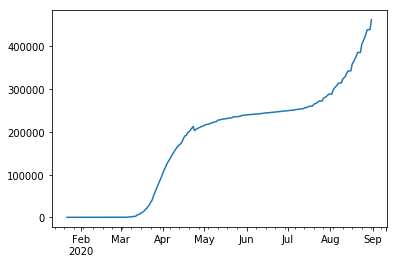

In [16]:
# Curva de evolución de contagiados en España
global_confirmed['Country']['Spain'].plot()

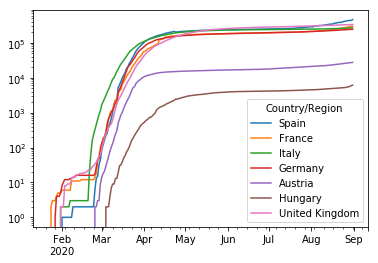

In [17]:
# Curva de contagiados en España, Francia
# Escala logarítimica en eje y
global_confirmed['Country'][['Spain','France', 'Italy', 'Germany', 'Austria', 'Hungary', 'United Kingdom']].plot(logy=True)

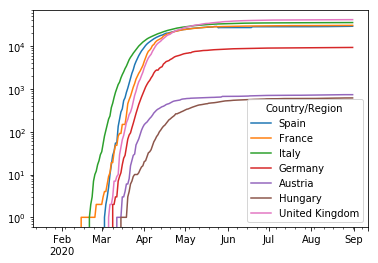

In [18]:
# Curva de fallecidos en España, Francia e Italia
# Escala logarítimica en eje y
global_deaths['Country'][['Spain','France', 'Italy', 'Germany', 'Austria', 'Hungary', 'United Kingdom']].plot(logy=True)

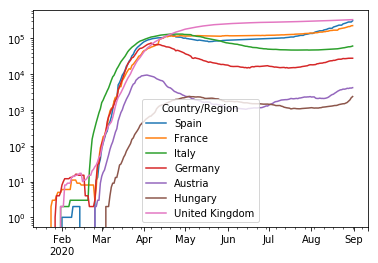

In [19]:
# Curva de contagiados - curados en España, Francia
# Escala logarítimica en eje y
global_conf_rec['Country'][['Spain','France', 'Italy', 'Germany', 'Austria', 'Hungary', 'United Kingdom']].plot(logy=True)

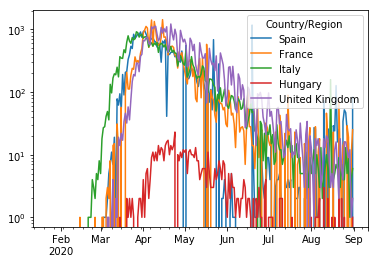

In [20]:
# Pero como lo importa es la velocidad, se pueden representar los datos como incrementos/diarios de fallecidos
global_deaths['Country'][['Spain','France', 'Italy', 'Hungary', 'United Kingdom']].diff(periods=1).plot(logy=True)

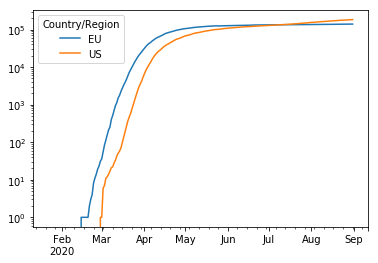

In [21]:
global_deaths['Country'][['EU','US']].plot(logy=True)

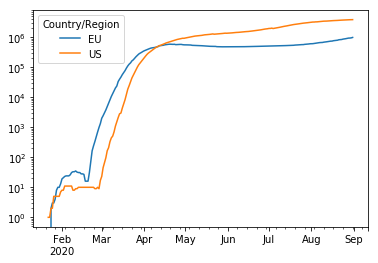

In [22]:
global_conf_rec['Country'][['EU','US']].plot(logy=True)

In [23]:
for s in global_confirmed['Country'][['EU','US']].columns:
    print(global_confirmed['Country'][[s]].values)

[[      0]
 [      0]
 [      2]
 [      3]
 [      3]
 [      4]
 [      8]
 [     10]
 [     10]
 [     13]
 [     19]
 [     21]
 [     23]
 [     24]
 [     24]
 [     24]
 [     26]
 [     31]
 [     33]
 [     33]
 [     35]
 [     35]
 [     35]
 [     35]
 [     36]
 [     36]
 [     36]
 [     36]
 [     36]
 [     36]
 [     53]
 [     95]
 [    188]
 [    262]
 [    365]
 [    523]
 [    773]
 [   1058]
 [   1405]
 [   2112]
 [   2606]
 [   3202]
 [   4076]
 [   5342]
 [   6978]
 [   8942]
 [  11306]
 [  14022]
 [  16993]
 [  21634]
 [  24910]
 [  35073]
 [  42470]
 [  49823]
 [  59977]
 [  69934]
 [  82369]
 [  99172]
 [ 116608]
 [ 135290]
 [ 152070]
 [ 174820]
 [ 195346]
 [ 221848]
 [ 252928]
 [ 283560]
 [ 315352]
 [ 340675]
 [ 367024]
 [ 397381]
 [ 427134]
 [ 455507]
 [ 485747]
 [ 513082]
 [ 534662]
 [ 555571]
 [ 578364]
 [ 604237]
 [ 629619]
 [ 655615]
 [ 677392]
 [ 721176]
 [ 738410]
 [ 754677]
 [ 776103]
 [ 809026]
 [ 830019]
 [ 842121]
 [ 864308]
 [ 877233]
 [ 892820]